In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# get data
in_file_name = "/Users/panindra/Desktop/Machine Learning/Clustering/SCLC_study_output_filtered.csv"
data_in = pd.read_csv(in_file_name, header=0)
data_in.columns.shape

(20,)

In [3]:
data_in.head()

,Unnamed: 0,295,464,961,1000,1076,1078,1150,1153,1162,1256,1259,1262,1276,1283,1365,1381,1387,1414,1553
0,NSCLC_A549_1,1246686.524,59929.70461,205990.1024,141932.6728,1581944.950,8.887623e+05,2010901.874,646161.3985,308624.5720,1226676.022,432775.5161,1682597.289,616102.1974,90521.64522,5.872333e+05,1664931.401,624615.6967,645473.1920,6.867305e+05
1,NSCLC_H1703_2,1338013.461,89261.66256,245504.4646,153877.9564,1540255.324,6.926569e+05,1551694.853,516276.2156,405340.4733,1604223.193,576127.4046,1399125.584,508743.2592,65972.45613,9.888830e+05,2281045.486,860709.5233,293504.7109,9.408252e+05
2,NSCLC_H1703_1,1040438.105,96002.36973,321302.7635,184414.1863,1638339.884,7.405865e+05,1437951.238,482798.7760,389654.6384,1555350.658,555434.0826,1378829.209,497591.3750,68732.01593,1.002957e+06,2026722.484,765475.8487,313811.6234,1.086556e+06
3,NSCLC_A549_2,1371135.588,81436.65785,299820.7353,261578.5732,1730887.909,1.144259e+06,2272554.651,773292.3518,362162.4799,1359538.194,495468.0917,1821494.948,635561.3457,89888.93269,6.085336e+05,1732423.877,649737.5435,762600.1361,8.461167e+05
4,NSCLC_H1437_1,1107105.986,92368.82235,225084.5830,149658.9117,1149976.279,1.306578e+06,2386937.600,802728.3053,345864.8827,1044867.464,377669.1186,1617663.099,568534.8039,84579.99092,2.421161e+05,1419139.504,531985.3086,459612.8875,4.022300e+05


In [4]:
y = data_in.iloc[:,0]
z = y

In [5]:
def startsCheck(y):
    if y.startswith("SCLC"):
        y = "SCLC"
    elif y.startswith("NSCLC"):
        y = "NSCLC"
    return y

In [6]:
y = y.map(lambda x: startsCheck(x))

In [7]:
z = y

In [8]:
from sklearn.preprocessing import LabelEncoder

X = data_in.iloc[:,1:].values
y = data_in.iloc[:,0].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'NSCLC', 2: 'SCLC'}

In [9]:
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 1246686.524      59929.70461   205990.1024    141932.6728   1581944.95
   888762.255    2010901.874     646161.3985    308624.572    1226676.022
   432775.5161   1682597.289     616102.1974     90521.64522   587233.2752
  1664931.401     624615.6967    645473.192     686730.5097 ]

Mean Vector class 2: [ 1371135.588      81436.65785   299820.7353    261578.5732   1730887.909
  1144259.294    2272554.651     773292.3518    362162.4799   1359538.194
   495468.0917   1821494.948     635561.3457     89888.93269   608533.6011
  1732423.877     649737.5435    762600.1361    846116.6842 ]



In [10]:
data_sample = np.c_[z,X]
data_sample = pd.DataFrame(data_sample)
data_sample1 = data_sample[data_sample[0] == "NSCLC"]
data_sample2 = data_sample[data_sample[0] == "SCLC"]

In [11]:
data_sample1 = data_sample1.iloc[:,1:]
data_sample2 = data_sample2.iloc[:,1:]
data_sample1 = np.array(data_sample1)
data_sample2 = np.array(data_sample2)

In [12]:
#Scatter matrix with-in class
cov1 = np.cov(data_sample1.astype(float), rowvar=False)
cov1.shape
cov2 = np.cov(data_sample2.astype(float), rowvar=False)
cov2.shape
S_W = cov1 + cov2
print('With-in Class Scatter Matrix:\n', S_W)

('With-in Class Scatter Matrix:\n', array([[  4.12844306e+10,   9.95238873e+08,  -2.89798716e+07,
         -2.60021557e+08,   1.91160692e+10,  -1.48595052e+10,
         -3.87300387e+09,   9.18561175e+08,  -5.56303460e+09,
          1.49326667e+08,   6.94922017e+08,   2.80727858e+10,
          1.05963101e+10,   1.39701724e+09,   2.14999067e+09,
          2.23857903e+10,   8.73301707e+09,   1.09591687e+10,
          1.65593565e+10],
       [  9.95238873e+08,   2.06031123e+08,   4.65218522e+08,
          1.05875860e+08,   1.52800273e+09,  -2.40737009e+09,
          1.12656522e+08,  -1.45308846e+08,  -5.26496497e+08,
          3.64323082e+08,   1.59758348e+08,   2.69682654e+09,
          1.03632327e+09,   1.23726212e+08,   9.17935554e+08,
          1.94670511e+09,   7.19930690e+08,   8.38489282e+08,
          3.83188612e+08],
       [ -2.89798716e+07,   4.65218522e+08,   9.56744855e+09,
          7.22126357e+09,   1.26580105e+10,   5.52237986e+09,
          2.69158814e+10,   2.00488134e+09

In [13]:
#Covariance between the class
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((19,19))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(19,1) # make column vector
    overall_mean = overall_mean.reshape(19,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

('between-class Scatter Matrix:\n', array([[  5.52897784e+10,  -3.64904256e+09,   1.40043947e+10,
          2.70004486e+10,   2.05582519e+11,   1.06920331e+11,
          1.74705449e+11,   4.55757869e+10,  -5.62507484e+09,
          1.34601791e+11,   5.18918732e+10,  -3.64601742e+10,
         -1.76465441e+10,  -8.25719414e+08,   4.20925991e+10,
          1.23430166e+11,   4.84711696e+10,  -1.67560440e+09,
          1.30770780e+11],
       [ -3.64904256e+09,   7.54414029e+08,   1.52456940e+08,
         -7.64654691e+08,  -1.89906249e+10,  -6.80022096e+09,
         -1.38041179e+10,  -2.58375612e+09,   1.51519859e+09,
         -1.18230363e+10,  -4.35980314e+09,   6.22468101e+09,
          2.18728481e+09,   7.56796691e+07,  -4.04719306e+09,
         -1.17808161e+10,  -4.65023091e+09,   2.19977042e+09,
         -1.09628379e+10],
       [  1.40043947e+10,   1.52456940e+08,   5.80454089e+09,
          8.97180802e+09,   4.07039278e+10,   2.76194013e+10,
          3.94842278e+10,   1.24332178e+10

In [14]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(19,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.01738382]
 [ 0.43530765]
 [ 0.30801123]
 [-0.33125176]
 [-0.03189682]
 [ 0.03097395]
 [-0.00517313]
 [-0.03780931]
 [ 0.00772285]
 [-0.11641737]
 [-0.01299979]
 [-0.19925564]
 [ 0.51354968]
 [-0.08793038]
 [ 0.05932472]
 [-0.18808125]
 [ 0.48599685]
 [ 0.04604176]
 [ 0.00413274]]
Eigenvalue 1: 3.09e+01

Eigenvector 2: 
[[ -3.17425975e-03]
 [  7.96413564e-01]
 [ -1.93054338e-01]
 [  2.34263730e-01]
 [  7.67447885e-04]
 [ -5.84702665e-04]
 [ -9.15956091e-03]
 [  1.15375756e-02]
 [  2.08526192e-02]
 [  3.47488892e-02]
 [ -4.87054327e-02]
 [  1.44349063e-01]
 [ -3.83940466e-01]
 [ -2.02923225e-01]
 [ -6.48604730e-03]
 [  8.85380606e-02]
 [ -2.27437795e-01]
 [  1.22696315e-02]
 [ -1.22100595e-02]]
Eigenvalue 2: 8.84e+00

Eigenvector 3: 
[[-0.00443905]
 [ 0.68963585]
 [ 0.08370413]
 [-0.13315094]
 [-0.0139629 ]
 [ 0.02253184]
 [-0.0062401 ]
 [-0.02060666]
 [ 0.01789778]
 [ 0.14877445]
 [-0.32184404]
 [-0.11653879]
 [ 0.1874327 ]
 [-0.09988401]
 [ 0.04561421]
 [-0.182575

In [15]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(19,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

30.9024750002
8.84074364833
3.3826967122e-13
1.37026297746e-13
6.24520336446e-14
6.24520336446e-14
3.02022119292e-14
3.02022119292e-14
2.06113446189e-14
2.06113446189e-14
7.77313872273e-15
7.77313872273e-15
7.31272112708e-15
7.31272112708e-15
4.4691731405e-15
4.10261172078e-15
6.88104891531e-16
6.88104891531e-16
3.0744196958e-16


In [17]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 77.76%
eigenvalue 2: 22.24%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%


In [18]:
W = np.hstack((eig_pairs[0][1].reshape(19,1), eig_pairs[1][1].reshape(19,1)))
print('Matrix W:\n', W.real)

('Matrix W:\n', array([[ -1.73838231e-02,  -3.17425975e-03],
       [  4.35307648e-01,   7.96413564e-01],
       [  3.08011226e-01,  -1.93054338e-01],
       [ -3.31251759e-01,   2.34263730e-01],
       [ -3.18968198e-02,   7.67447885e-04],
       [  3.09739524e-02,  -5.84702665e-04],
       [ -5.17313433e-03,  -9.15956091e-03],
       [ -3.78093085e-02,   1.15375756e-02],
       [  7.72284766e-03,   2.08526192e-02],
       [ -1.16417366e-01,   3.47488892e-02],
       [ -1.29997934e-02,  -4.87054327e-02],
       [ -1.99255644e-01,   1.44349063e-01],
       [  5.13549676e-01,  -3.83940466e-01],
       [ -8.79303779e-02,  -2.02923225e-01],
       [  5.93247247e-02,  -6.48604730e-03],
       [ -1.88081246e-01,   8.85380606e-02],
       [  4.85996850e-01,  -2.27437795e-01],
       [  4.60417611e-02,   1.22696315e-02],
       [  4.13274323e-03,  -1.22100595e-02]]))


In [19]:
X_lda = X.dot(W)

/Users/panindra/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


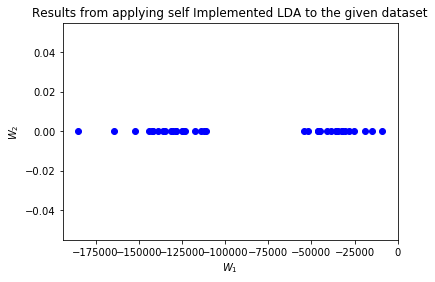

In [20]:
#Plot of self-implemented LDA
# Consider only first eigen vector as it cover 78%
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Results from applying self Implemented LDA to the given dataset')
ax.set_xlabel(r'$W_1$')
ax.set_ylabel(r'$W_2$')
ax.plot(X_lda[0:40, 0], np.zeros(40), linestyle='None', marker='o', color='blue', )

In [21]:
#AS first eigen vector cover 77.7%, Consider only one vector and plot the graph
#X_lda[:,0]

In [22]:
#LDA from Sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [23]:
sklearn_LDA = LDA(n_components=2)
sklearn_LDA_projection = sklearn_LDA.fit_transform(X, z)
sklearn_LDA_projection = -sklearn_LDA_projection

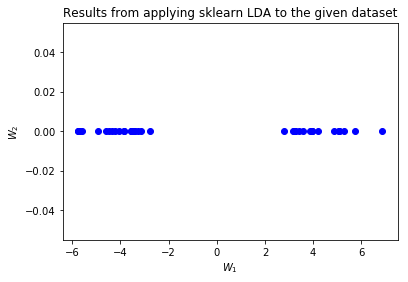

In [24]:
#Plot of Sklearn LDA library function
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Results from applying sklearn LDA to the given dataset')
ax.set_xlabel(r'$W_1$')
ax.set_ylabel(r'$W_2$')
ax.plot(sklearn_LDA_projection[0:40, 0], np.zeros(40), linestyle='None', marker='o', color='blue', label='setosa')